<a href="https://colab.research.google.com/github/nancypal50/DL_LAB/blob/main/DL_que2_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
print('Loading data...')
train = pd.read_csv('/train.csv')
test = pd.read_csv('/test.csv')

Loading data...


In [ ]:
print(train.shape)
print(test.shape)

(42000, 785)
(28000, 784)


In [ ]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_X = train.iloc[:, 1:].values.astype('float32') #pixel_0 to 778
train_y = train.iloc[:, 0].values.astype('int') #label
test_X = test.values.astype('float32') #pixel_0 to _778

In [ ]:
import chainer
import chainer.links as L
import chainer.functions as F
from chainer.dataset.convert import concat_examples

In [ ]:
class MLP(chainer.Chain):
    def __init__(self, n_hidden, n_out):
        super (MLP, self).__init__(
            l1 = L.Linear(None, n_hidden),
            l2 = L.Linear(n_hidden, n_hidden),
            l3 = L.Linear(n_hidden, n_out),)
            
    def __call__(self, x):
        h1 = F.relu(self.l1(x))
        h2 = F.relu(self.l2(h1))
        return self.l3(h2)


print('Constructing model...')
hidden_dim = 32  # Hidden dim for neural network
out_dim = 10     # Number of labels to classify, it is 10 for MNIST task.

model = MLP(hidden_dim, out_dim)

Constructing model...


In [ ]:
from chainer import optimizers
#https://docs.chainer.org/en/stable/reference/optimizers.html

In [ ]:
optimizer = optimizers.Adam()
optimizer.setup(model)

In [ ]:
from chainer import iterators


In [ ]:
batch_size = 420

In [ ]:
dataset_train = []
for X, y in zip(train_X, train_y):
    dataset_train.append((X, y))
train_iterator = iterators.SerialIterator(
    dataset_train, 
    batch_size
)

In [ ]:
from chainer.datasets import TupleDataset
from sklearn.model_selection import train_test_split
from chainer import Variable

In [ ]:
X_train, X_val, y_train, y_val= train_test_split(train_X, train_y, 
                                                 test_size=0.20, 
                                                 random_state=42)

train_dataset = TupleDataset(X_train, y_train)

In [ ]:
print(train_dataset.__getitem__(10))

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,  

In [ ]:
train_accuracy_log = []
val_accuracy_log = []

max_epoch = 10

while train_iterator.epoch < max_epoch:
    #Prepare batch data
    batch = train_iterator.next()
    X_batch, y_batch = chainer.dataset.concat_examples(batch)
    
    #Calculate the cost
    train_y_preds = model(X_batch)
    train_loss = F.softmax_cross_entropy(train_y_preds, y_batch)
    
    #Learning
    model.cleargrads()
    train_loss.backward()
    optimizer.update()
    
    #Check accuracy
    train_accuracy = F.accuracy(train_y_preds, y_batch)
    train_accuracy_log.append(float(train_accuracy.data))
    
    #Check val accuracy and generalization performance
    if train_iterator.is_new_epoch:
        print('******************'*5)
        val_y_preds = model(X_val)
        val_loss = F.softmax_cross_entropy(val_y_preds, y_val)
        val_accuracy = F.accuracy(val_y_preds, y_val)
        
        val_accuracy_log.append(float(val_accuracy.data))
        
        print('epoch{} train_accuracy:{}, val_accuracy:{}'.\
              format(train_iterator.epoch,
                     train_accuracy.data,
                     val_accuracy.data))

******************************************************************************************
epoch1 train_accuracy:0.4809523820877075, val_accuracy:0.4404761791229248
******************************************************************************************
epoch2 train_accuracy:0.5833333134651184, val_accuracy:0.5745238065719604
******************************************************************************************
epoch3 train_accuracy:0.6952381134033203, val_accuracy:0.6872618794441223
******************************************************************************************
epoch4 train_accuracy:0.7476190328598022, val_accuracy:0.7599999904632568
******************************************************************************************
epoch5 train_accuracy:0.8285714387893677, val_accuracy:0.8178571462631226
******************************************************************************************
epoch6 train_accuracy:0.8357142806053162, val_accuracy:0.8464285731315613
**********

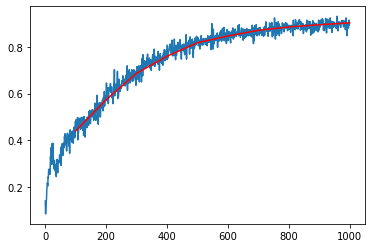

In [ ]:
plt.plot(range(len(train_accuracy_log)), 
         train_accuracy_log)
plt.plot(range(100, len(val_accuracy_log)*101, 100),
         val_accuracy_log, color='red')
plt.show()

In [ ]:
test_y_preds = model(test_X)
test_y_preds= test_y_preds.data
print(test_y_preds.shape)

(28000, 10)


In [ ]:
print('Saving submission file …')

test_y_preds = np.argmax(test_y_preds,axis = 1)

test_y_preds = pd.Series(test_y_preds,name="Label")

submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),test_y_preds],axis = 1)
submission.to_csv('/sample_submission.csv', index_label=False, index=False)

Saving submission file …
